In [54]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [55]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


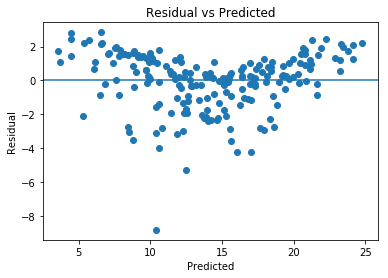

In [56]:
#heteroscedasticity issue
predicted = regr.predict(X).ravel()
actual = data["Sales"]

residual = actual - predicted
plt.scatter(predicted,residual)
plt.title("Residual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.show()



In [57]:
#in order to fix, let's use onehotencoder
data["TvOH"] = np.where(data["TV"] > data["TV"].mean(), 1, 0)
data["RadioOH"] = np.where(data["Radio"] > data["Radio"].mean(), 1, 0)
data["NewspaperOH"] = np.where(data["Newspaper"] > data["Newspaper"].mean(), 1, 0)


In [73]:
#fix multivariate multicolliniearity
correlation_matrix = X.corr()
display(correlation_matrix)
data["TVSQ"] = StandardScaler().fit_transform(data["TV"].values.reshape(-1,1))
data["RadioSQ"] = StandardScaler().fit_transform(data["Radio"].values.reshape(-1,1))
data["NewspaperSq"] = StandardScaler().fit_transform(data["Newspaper"].values.reshape(-1,1))


,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


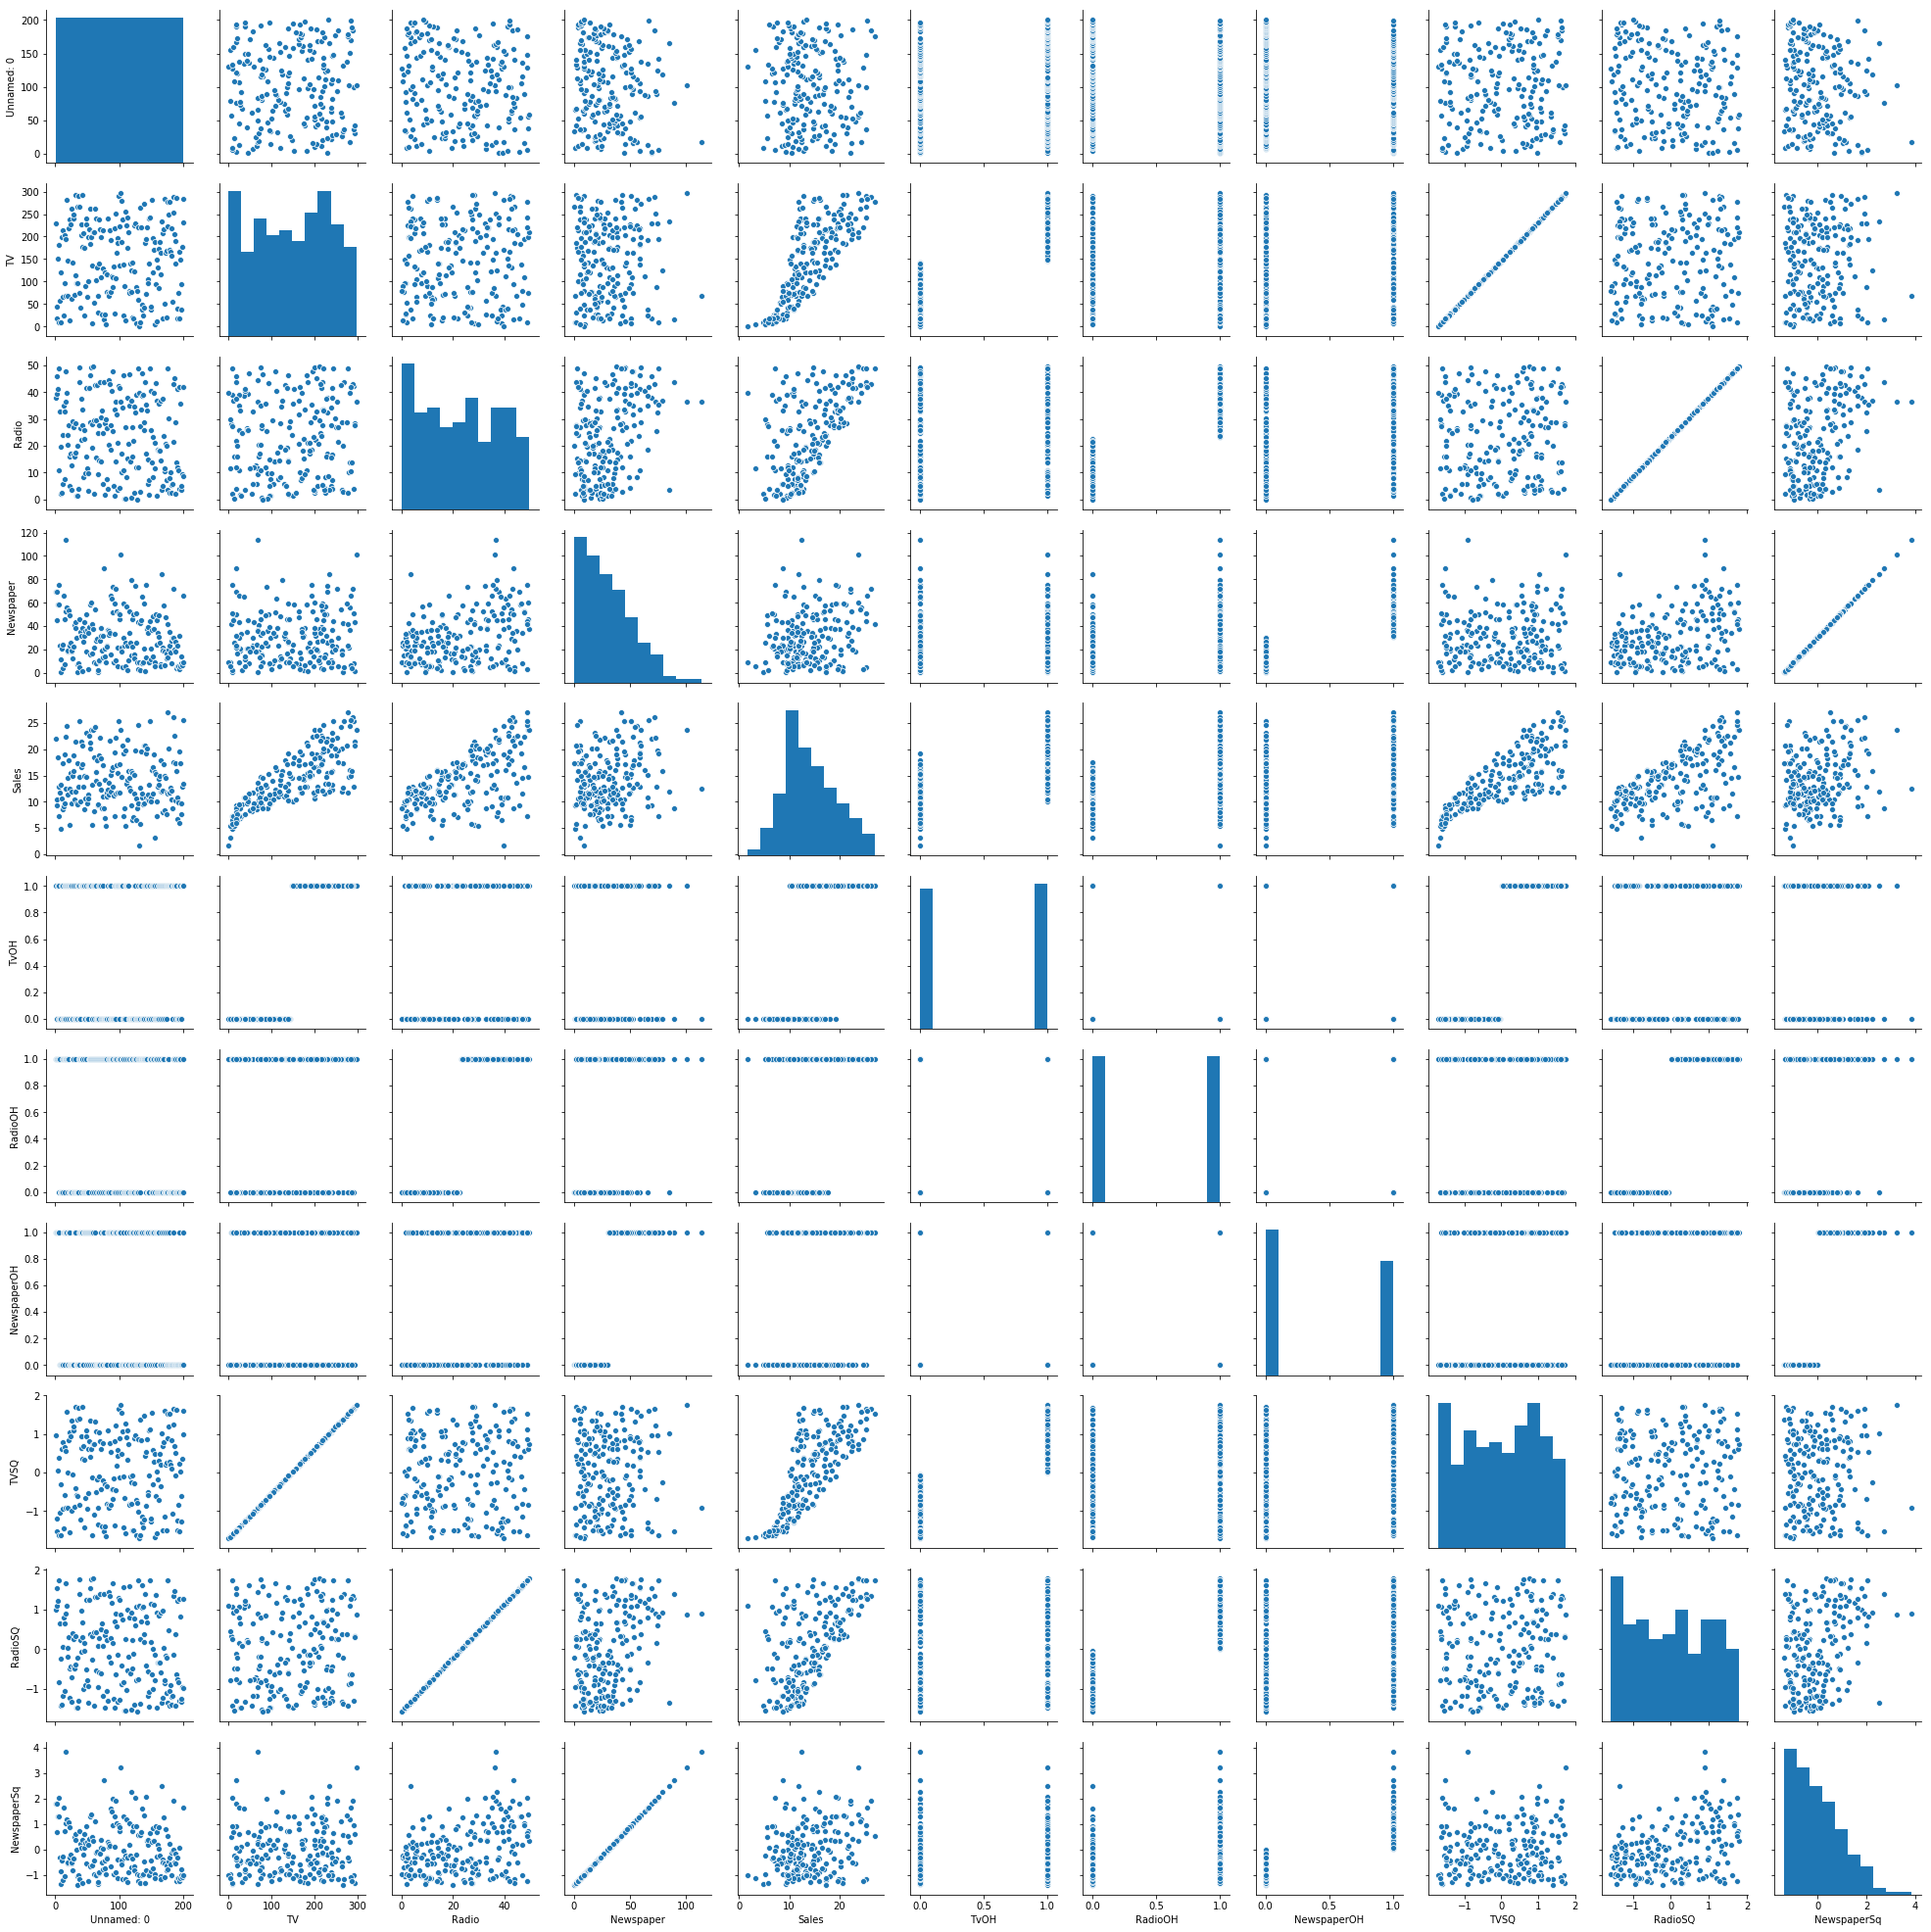

In [72]:
sns.pairplot(data)